In [105]:
import numpy
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Conv1D,MaxPooling1D,Dropout
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [106]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)


In [107]:
max_review_length = 500
X_train = keras.utils.pad_sequences(X_train, maxlen=max_review_length)
X_test = keras.utils.pad_sequences(X_test, maxlen=max_review_length)

In [18]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy:", scores[1])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_8 (LSTM)               (None, 100)               53200     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
391/391 [==============================] - 207s 526ms/step - loss: 0.4726 - accuracy: 0.7720 - val_loss: 0.3229 - val_accuracy: 0.8687
Epoch 2/3
391/391 [==============================] - 201s 514ms/step - loss: 0.2777 - accuracy: 0.8896 - val_loss: 0.3010 - val_accuracy: 0.8760
Epoch 3/3
391/391

In [19]:
results_list=[]

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 500, 32)           160000    
                                                                 
 conv1d_8 (Conv1D)           (None, 500, 32)           3104      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 250, 32)          0         
 1D)                                                             
                                                                 
 lstm_9 (LSTM)               (None, 100)               53200     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 216,405
Trainable params: 216,405
Non-trainable params: 0
_______________________________________________

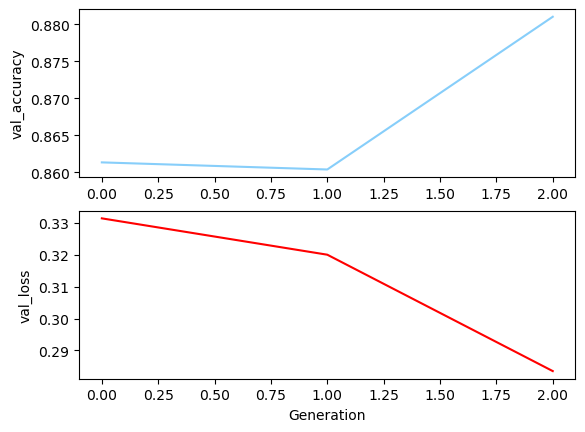

In [20]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
results=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
results_list.append(results)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy:", scores[1])


fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].set_ylabel("val_accuracy");
ax[1].set_xlabel("Generation");
ax[1].set_ylabel("val_loss");
ax[0].plot([i for i in range(len(results.history["val_accuracy"]))], results.history["val_accuracy"], color = 'lightskyblue')   
ax[1].plot([i for i in range(len(results.history["val_loss"]))], results.history["val_loss"], color = 'red') 
plt.show()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 500, 32)           160000    
                                                                 
 conv1d_9 (Conv1D)           (None, 500, 32)           3104      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 250, 32)          0         
 1D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 250, 32)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100)               53200     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                     

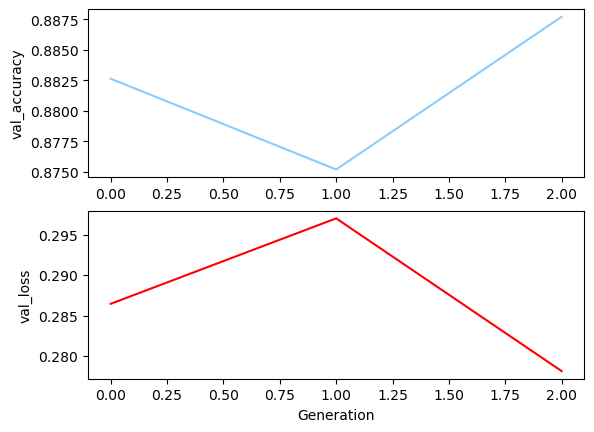

In [21]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
results=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
results_list.append(results)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy:", scores[1])

fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].set_ylabel("val_accuracy");
ax[1].set_xlabel("Generation");
ax[1].set_ylabel("val_loss");
ax[0].plot([i for i in range(len(results.history["val_accuracy"]))], results.history["val_accuracy"], color = 'lightskyblue')   
ax[1].plot([i for i in range(len(results.history["val_loss"]))], results.history["val_loss"], color = 'red') 
plt.show()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 500, 32)           160000    
                                                                 
 conv1d_10 (Conv1D)          (None, 500, 32)           3104      
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 250, 32)          0         
 g1D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 250, 32)           0         
                                                                 
 lstm_11 (LSTM)              (None, 100)               53200     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                     

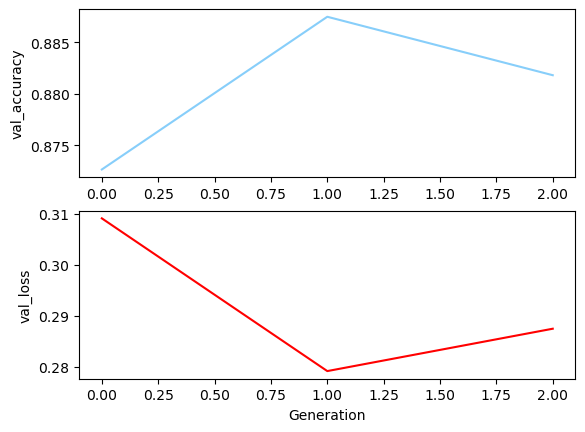

In [22]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
results=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
results_list.append(results)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy:", scores[1])

fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].set_ylabel("val_accuracy");
ax[1].set_xlabel("Generation");
ax[1].set_ylabel("val_loss");
ax[0].plot([i for i in range(len(results.history["val_accuracy"]))], results.history["val_accuracy"], color = 'lightskyblue')   
ax[1].plot([i for i in range(len(results.history["val_loss"]))], results.history["val_loss"], color = 'red') 
plt.show()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 500, 32)           160000    
                                                                 
 conv1d_11 (Conv1D)          (None, 500, 32)           3104      
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 250, 32)          0         
 g1D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 250, 32)           0         
                                                                 
 lstm_12 (LSTM)              (None, 100)               53200     
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                     

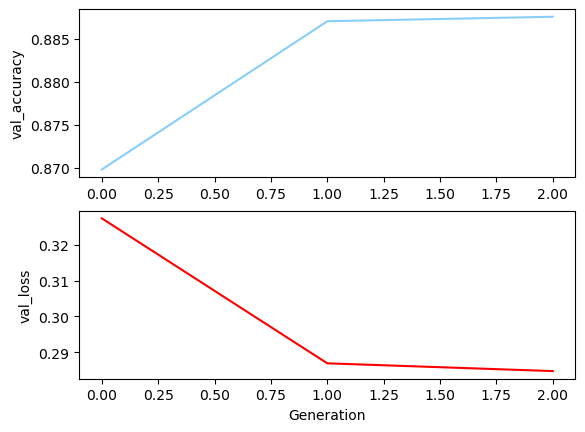

In [23]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))
model.add(LSTM(100))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
results=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
results_list.append(results)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy:", scores[1])


fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].set_ylabel("val_accuracy");
ax[1].set_xlabel("Generation");
ax[1].set_ylabel("val_loss");
ax[0].plot([i for i in range(len(results.history["val_accuracy"]))], results.history["val_accuracy"], color = 'lightskyblue')   
ax[1].plot([i for i in range(len(results.history["val_loss"]))], results.history["val_loss"], color = 'red') 
plt.show()

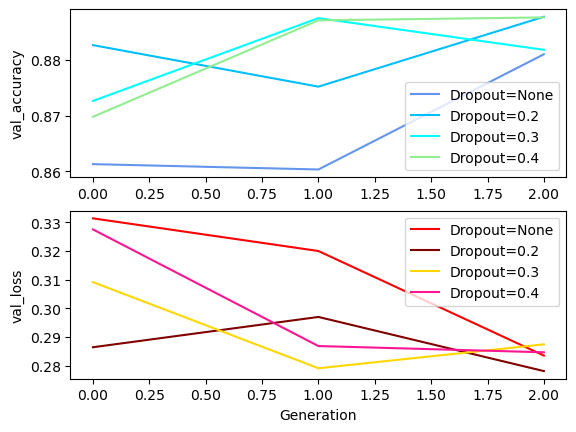

In [24]:
name=["Dropout=None","Dropout=0.2","Dropout=0.3","Dropout=0.4"]
color_accuracy=["cornflowerblue","deepskyblue","cyan","lightgreen"]
color_loss=["red","maroon","gold","deeppink"]

fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].set_ylabel("val_accuracy");
ax[1].set_xlabel("Generation");
ax[1].set_ylabel("val_loss");
for i in range(len(results_list)):
    ax[0].plot([i for i in range(len(results_list[i].history["val_accuracy"]))], results_list[i].history["val_accuracy"], color =color_accuracy[i] ,label =f"{name[i]}")   
    ax[1].plot([i for i in range(len(results_list[i].history["val_loss"]))], results_list[i].history["val_loss"], color =color_loss[i] ,label =f"{name[i]}") 
ax[0].legend()
ax[1].legend()
plt.show()

Как мы видим по графикам обучения 4х моделей нейросетей, оптимальной вариантом будет использование параметра Dropout равного 0.4 так как итоговая точность выше, чем у остальных вариантов нейросети. При параметрах 0.2 и 0.3 по графикам можно выявить сильное падение точности, что может свидетельствовать о слишком сильном шуме для данной архитектуры. Без параметра droput обучение идет хуже и точность ниже, чем у аналогичных архитектур, которые используют этот параметр. Dropout равного 0.2 или 0.4.

In [129]:
from sklearn.model_selection import KFold
import numpy as np

models = []
for i in range(3):
    model = Sequential()
    model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(LSTM(100))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    models.append(model)

# создаем массивы для предсказаний базовых моделей
kf = KFold(n_splits=5, shuffle=True)
X_stack_train = np.zeros((X_train.shape[0], len(models)))
X_stack_test = np.zeros((X_test.shape[0], len(models)))
for i, model in enumerate(models):
    for train_index, val_index in kf.split(X_train):
        model.fit(X_train[train_index], y_train[train_index], epochs=3, batch_size=64, verbose=0)
        X_stack_train[val_index, i] = model.predict(X_train[val_index]).ravel()
    X_stack_test[:, i] = model.predict(X_test).ravel()

# обучаем мета-модель на предсказаниях базовых моделей
meta_model = Sequential()
meta_model.add(Dense(10, input_dim=len(models), activation='relu'))
meta_model.add(Dense(1, activation='sigmoid'))
meta_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
result_ans_data= meta_model.fit(X_stack_train, y_train, epochs=3, batch_size=64)

782/782 [==============================] - 22s 28ms/step
Epoch 1/3
391/391 [==============================] - 1s 811us/step - loss: 0.5722 - accuracy: 0.7651
Epoch 2/3
391/391 [==============================] - 0s 784us/step - loss: 0.3366 - accuracy: 0.8721
Epoch 3/3
391/391 [==============================] - 0s 759us/step - loss: 0.3091 - accuracy: 0.8743


Для ансамблирования используется метод или стекинга (обучения мета-модели на предсказаниях базовых моделей).

Accuracy: 0.873960018157959


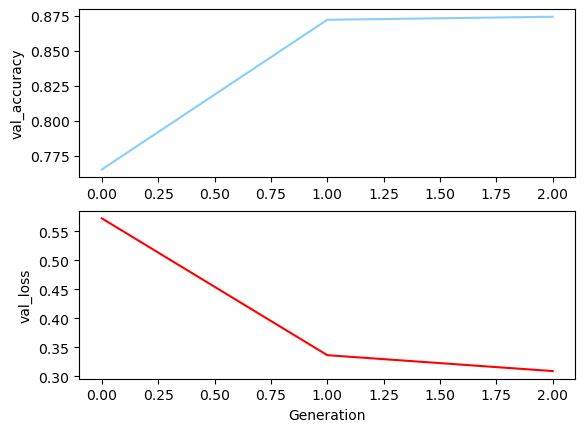

In [130]:
scores = meta_model.evaluate(X_stack_train, y_train, verbose=0)
print("Accuracy:", scores[1])

fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].set_ylabel("val_accuracy");
ax[1].set_xlabel("Generation");
ax[1].set_ylabel("val_loss");
ax[0].plot([i for i in range(len(result_ans_data.history["accuracy"]))], result_ans_data.history["accuracy"], color = 'lightskyblue')   
ax[1].plot([i for i in range(len(result_ans_data.history["loss"]))], result_ans_data.history["loss"], color = 'red') 
plt.show()

Как видно по графикам, обучение методом стекинга прошло успешно.

In [113]:
def Get_word(word):
    if word in word_index:
        if word_index[word]<500:
            return word_index[word]
    return 0

In [114]:
import string
top_words = 500
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
word_index = imdb.get_word_index()
max_review_length = 500
X_train = keras.utils.pad_sequences(X_train, maxlen=max_review_length)
X_test = keras.utils.pad_sequences(X_test, maxlen=max_review_length)

In [127]:
text=input("Enter text:\n")
text = text.translate(str.maketrans('', '', string.punctuation))
text_list =text.lower().split()
text_data=[ Get_word(i)  for i in text_list]

max_review_length = 500
text_data = keras.utils.pad_sequences([text_data], maxlen=max_review_length)

Enter text:
Everything about Fight Club is simply amazing. The acting, the directing, and the story is simply superb. However, going into this film I had already had had some of the major twists spoiled for me, and this is a movie that relies so heavily on those twists that knowing them will detract from the experience significantly. Because of that, the film is really only worth seeing of you have no prior knowledge of it whatsoever.


In [128]:
data=[]
for i, model in enumerate(models):
    data.append (model.predict(text_data))
print(np.mean(data))

1/1 [==============================] - 0s 20ms/step
0.9786251


Был реализован метод загрузки пользовательского текста, который форматирует текст и переводит его в набор индексов из базы imdb. После чего данные отправляются в обученные методом стекинга нейросети, который выводят результат, что отзыв был положительным. На сайте отзыв имеет оценку 9\10, что совпадает с результатом нейросети.